### **CC57 - MACHINE LEARNING - ENSEMBLE DE CLASIFICADORES - RANDOM FORESTS**

### **Comprensión del negocio**

**Objetivo del negocio:** Incrementar el marketshare de "Perú Bank" en el mercado de depósitos a plazo.

**Objetivo de ML:** Predecir la probabilidad de que un cliente acepte el producto de depósito a plazo que ofrece **"Perú Bank"** mediante el canal de Call Center.

### **Comprensión de los datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('bank_deposit.csv')

In [3]:
data.head(5)

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra
0,1,261,0,1,1,0,0,0,1
1,2,50,0,1,1,0,0,0,1
2,3,1492,0,1,1,0,0,0,1
3,4,104,0,1,1,0,0,0,1
4,5,13,0,1,1,0,0,0,1


In [4]:
data.dtypes

idcliente    int64
duration     int64
previous     int64
housing      int64
campaign     int64
loan         int64
default      int64
target       int64
muestra      int64
dtype: object

In [5]:
data['housing'] = data['housing'].astype(object)
data['loan'] = data['loan'].astype(object)
data['default'] = data['default'].astype(object)

In [6]:
data.dtypes

idcliente     int64
duration      int64
previous      int64
housing      object
campaign      int64
loan         object
default      object
target        int64
muestra       int64
dtype: object

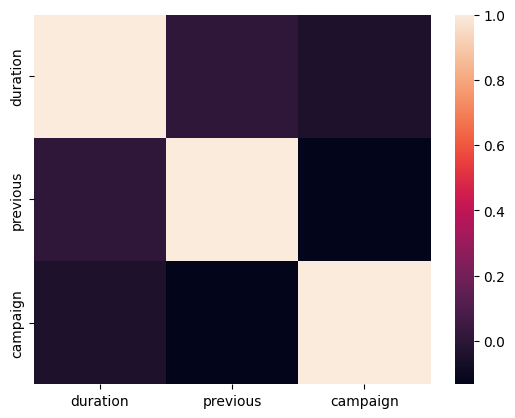

In [7]:
#Heatmap
sns.heatmap(data.loc[:,['duration','previous','campaign']].corr(method = "spearman"))
plt.show()

In [8]:
#Prueba de Correlación
#Ho: no existe correlación entre las variables
#Ha: existe correlación entre las variables

In [9]:
data.loc[:,['duration','previous','campaign']].corr(method = "spearman")

,duration,previous,campaign
duration,1.000000,0.007392,-0.045111
previous,0.007392,1.000000,-0.133380
campaign,-0.045111,-0.133380,1.000000


In [10]:
data['target'].dtype

dtype('int64')

In [11]:
data['target'] = data['target'].astype('int64')

In [12]:
data['target'].dtype

dtype('int64')

In [13]:
data.target.value_counts()

target
0    5289
1    5289
Name: count, dtype: int64

In [14]:
100*data['target'].value_counts(normalize=True)

target
0    50.0
1    50.0
Name: proportion, dtype: float64

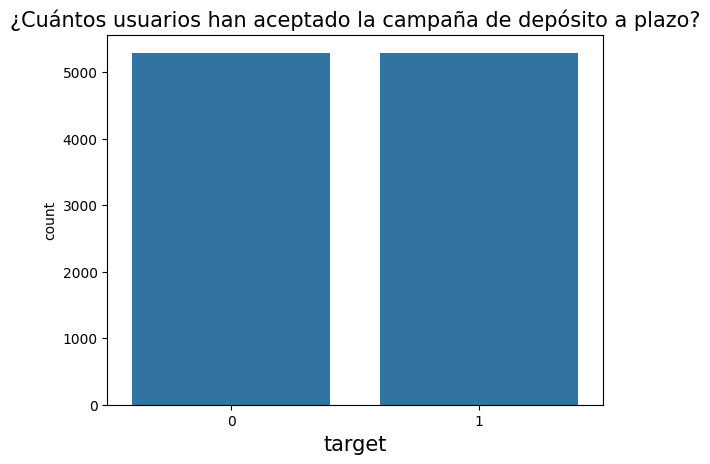

In [15]:
sns.countplot(data = data, x = 'target')
plt.xlabel('target', fontsize = 15)
plt.title('¿Cuántos usuarios han aceptado la campaña de depósito a plazo?', fontsize = 15)
plt.show()

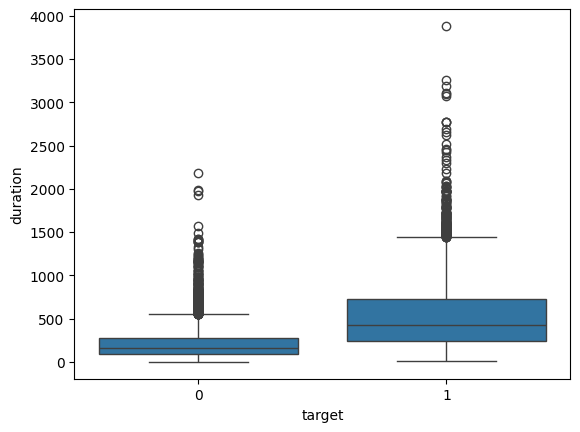

In [16]:
sns.boxplot(x='target',y='duration',data=data)
plt.show()

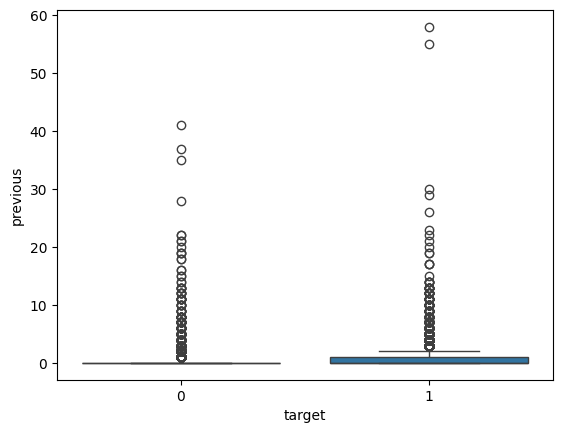

In [17]:
sns.boxplot(x='target',y='previous',data=data)
plt.show()

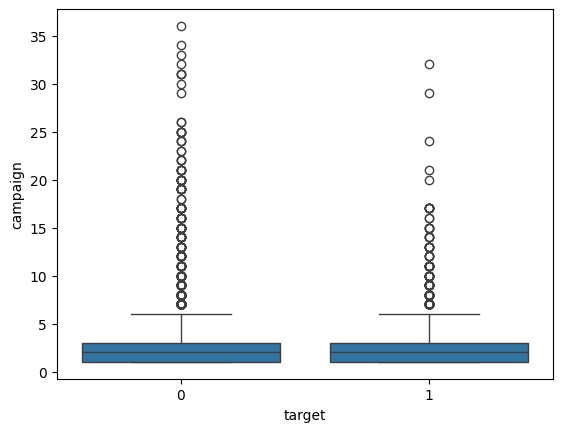

In [18]:
sns.boxplot(x='target',y='campaign',data=data)
plt.show()

housing     0     1
target             
0        2176  3113
1        3354  1935


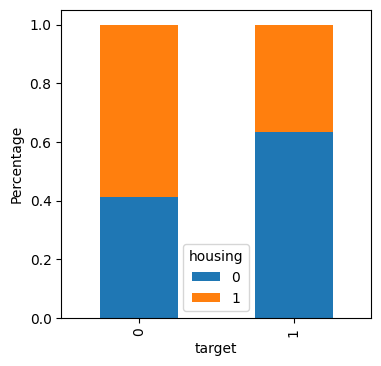

In [19]:
print(pd.crosstab(data["target"],data["housing"]))
t = pd.crosstab(data["target"],data["housing"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

loan       0    1
target           
0       4359  930
1       4805  484


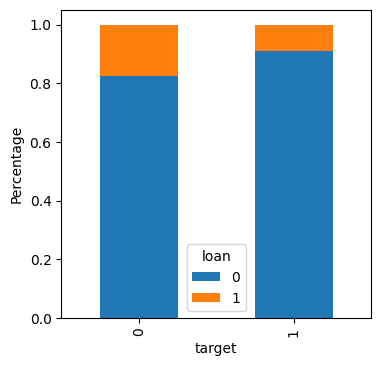

In [20]:
print(pd.crosstab(data["target"],data["loan"]))
t = pd.crosstab(data["target"],data["loan"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

default     0   1
target           
0        5202  87
1        5237  52


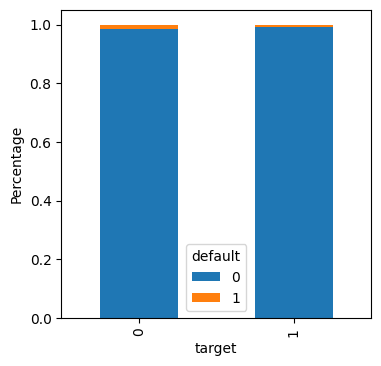

In [21]:
print(pd.crosstab(data["target"],data["default"]))
t = pd.crosstab(data["target"],data["default"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

### **Preparación de los datos**

In [22]:
#La función sklearn.preprocessing.LabelEncoder codifica etiquetas de una característica categórica en valores numéricos
#entre 0 y el número de clases menos 1.

data['c_housing'] = LabelEncoder().fit_transform(data.housing.values)
data['c_loan'] = LabelEncoder().fit_transform(data.loan.values)
data['c_default'] = LabelEncoder().fit_transform(data.default.values)

In [23]:
data.head(5)

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra,c_housing,c_loan,c_default
0,1,261,0,1,1,0,0,0,1,1,0,0
1,2,50,0,1,1,0,0,0,1,1,0,0
2,3,1492,0,1,1,0,0,0,1,1,0,0
3,4,104,0,1,1,0,0,0,1,1,0,0
4,5,13,0,1,1,0,0,0,1,1,0,0


In [24]:
X = data[['c_housing','c_loan','duration']]
y = data['target']

In [25]:
X = X.to_numpy()

In [26]:
X[0:5]

array([[   1,    0,  261],
       [   1,    0,   50],
       [   1,    0, 1492],
       [   1,    0,  104],
       [   1,    0,   13]])

In [27]:
y = y.to_numpy()

In [28]:
y[0:5]

array([0, 0, 0, 0, 0])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [30]:
X_train[0:5]

array([[   1,    0, 1080],
       [   1,    0,  204],
       [   0,    0,  140],
       [   0,    0,  373],
       [   0,    0,  194]])

In [31]:
X_test[0:5]

array([[  0,   0, 263],
       [  0,   0, 597],
       [  0,   0, 150],
       [  0,   0, 917],
       [  1,   0, 404]])

In [32]:
X_train_orig = X_train
X_test_orig = X_test

In [33]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [34]:
X_train[0:5]

array([[ 1.05317258, -0.39338138,  2.00876968],
       [ 1.05317258, -0.39338138, -0.50165504],
       [-0.949512  , -0.39338138, -0.68506507],
       [-0.949512  , -0.39338138, -0.01733795],
       [-0.949512  , -0.39338138, -0.53031286]])

In [35]:
X_test[0:5]

array([[-0.97941782, -0.39051946, -0.32766412],
       [-0.97941782, -0.39051946,  0.63785382],
       [-0.97941782, -0.39051946, -0.65432139],
       [-0.97941782, -0.39051946,  1.56290095],
       [ 1.02101471, -0.39051946,  0.07993477]])

### **Modelado**

**(1) Ensemble Random Forests SIN hiperparametros**

In [36]:
#Validación Cruzada
cv_scores = cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5)

In [37]:
#Accuracy
print(cv_scores)

[0.70939161 0.72947431 0.70803783 0.74113475 0.72458629]


In [38]:
#Accuracy Promedio
print("cv_scores mean:{}".format(np.mean(cv_scores)))

cv_scores mean:0.7225249567472236


**(2) Ensemble Random Forests CON hiperparametros**

In [39]:
#Tuning
#n_estimators: Número de árboles.  Esta es la cantidad de árboles (en general, la cantidad de muestras en las que funcionará este algoritmo y
#luego las agregará para darle la respuesta final) que desea construir antes de tomar la votación máxima o los promedios de predicciones.
#Una mayor cantidad de árboles brinda un mejor rendimiento pero hace que el código sea más lento.

#max_features: cantidad máxima de características a considerar al buscar el mejor split
#max_depth: Profundidad del árbol

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [40]:
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=200; total time=   0.6s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=200; total time=   0.6s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=300; total time=   1.1s
[CV] END ...max_depth=2, max_features=sqrt, n_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700]},
             verbose=2)

In [41]:
print(grid.best_estimator_)

RandomForestClassifier(max_depth=5, n_estimators=400)


In [67]:
#Random Forest
classifier = RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=400).fit(X_train, y_train)

In [68]:
feature_scores = pd.Series(classifier.feature_importances_, index=['housing','loan','duration']).sort_values(ascending=False)
feature_scores

duration    0.831162
housing     0.131650
loan        0.037188
dtype: float64

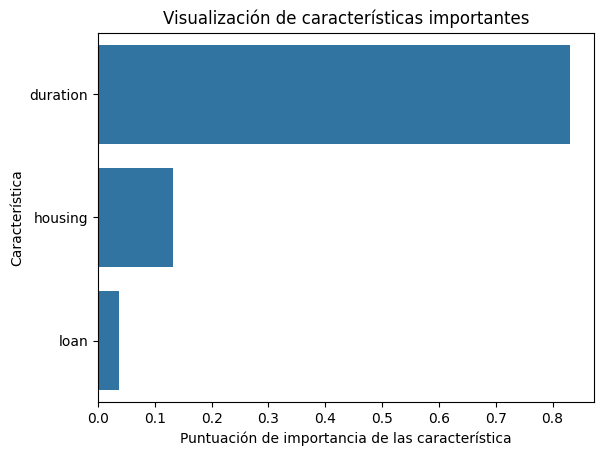

In [70]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Puntuación de importancia de las característica')
plt.ylabel('Característica')
plt.title("Visualización de características importantes")
plt.show()

### **Evaluación**

Apartir de los datos de prueba.

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
y_pred[0:20]

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [74]:
y_test[0:20]

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [75]:
confusion_matrix(y_test, y_pred)

array([[795, 234],
       [237, 850]])

Confusion matrix, without normalization
[[795 234]
 [237 850]]
Normalized confusion matrix
[[0.77259475 0.22740525]
 [0.21803128 0.78196872]]


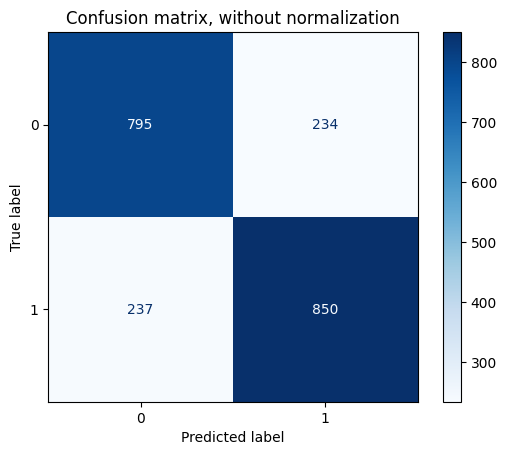

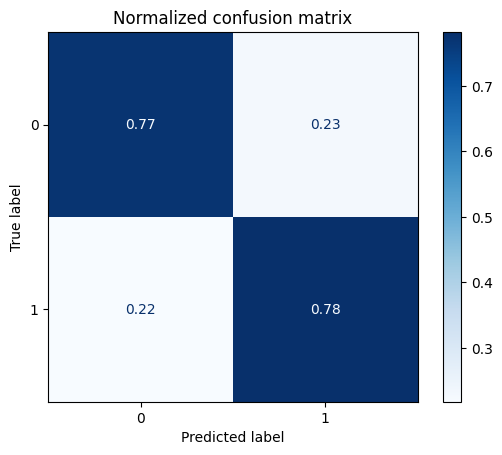

In [76]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [77]:
y_pred_prob = classifier.predict_proba(X_test)

In [78]:
y_pred_prob[0:5]

array([[0.26355719, 0.73644281],
       [0.15237771, 0.84762229],
       [0.588364  , 0.411636  ],
       [0.10025836, 0.89974164],
       [0.49831302, 0.50168698]])

In [79]:
y_pred_prob[0:5,1]

array([0.73644281, 0.84762229, 0.411636  , 0.89974164, 0.50168698])

In [80]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [81]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8590914089383945

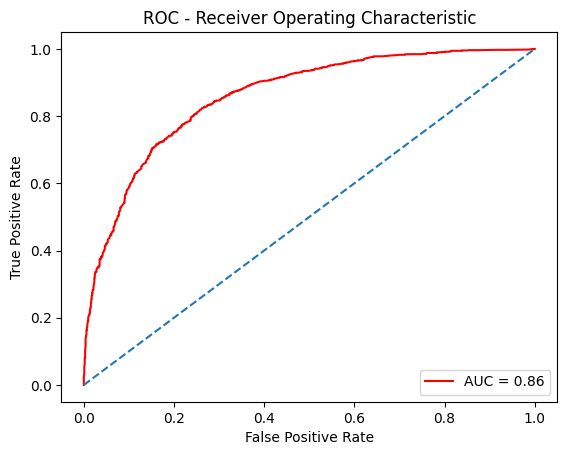

In [82]:
#ROC
#El ROC traza la tasa de verdaderos positivos ( TP ) frente a la tasa de falsos positivos (FP) en diferentes umbrales de clasificación.
#área bajo la curva característica operativa del receptor ( ROC )
#Utiliza la probabilidad para decirnos qué tan bien un modelo separa las clases.
#AUC
#El valor AUC se utiliza como resumen del rendimiento del modelo.
#Cuanto más esté hacia la izquierda la curva, más área habrá contenida bajo ella y por ende, mejor será el clasificador.

#Una puntuación AUC de alrededor de 0,5 significaría que el modelo no puede hacer una distinción entre las dos clases y la curva se vería como una línea con una pendiente de 1.
#Una puntuación AUC más cercana a 1 significa que el modelo tiene la capacidad de separe las dos clases y la curva se acercará a la esquina superior izquierda del gráfico.

plt.title('ROC - Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1029
           1       0.78      0.78      0.78      1087

    accuracy                           0.78      2116
   macro avg       0.78      0.78      0.78      2116
weighted avg       0.78      0.78      0.78      2116



In [87]:
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [88]:
dataf.head(5)

,0,1,2,0,0,0,1
0,-0.979418,-0.390519,-0.327664,1,1,0.263557,0.736443
1,-0.979418,-0.390519,0.637854,1,1,0.152378,0.847622
2,-0.979418,-0.390519,-0.654321,0,0,0.588364,0.411636
3,-0.979418,-0.390519,1.562901,1,1,0.100258,0.899742
4,1.021015,-0.390519,0.079935,1,1,0.498313,0.501687


In [90]:
dataf.columns = ['c_housing','c_loan','duration','Target','Target_Pred','Target_Pred_Prob_0','Target_Pred_Prob_1']

In [91]:
dataf.head(10)

,c_housing,c_loan,duration,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1
0,-0.979418,-0.390519,-0.327664,1,1,0.263557,0.736443
1,-0.979418,-0.390519,0.637854,1,1,0.152378,0.847622
2,-0.979418,-0.390519,-0.654321,0,0,0.588364,0.411636
3,-0.979418,-0.390519,1.562901,1,1,0.100258,0.899742
4,1.021015,-0.390519,0.079935,1,1,0.498313,0.501687
5,1.021015,-0.390519,-1.015668,0,0,0.983006,0.016994
6,1.021015,-0.390519,1.629389,1,1,0.099141,0.900859
7,-0.979418,-0.390519,-0.905819,0,0,0.934938,0.065062
8,-0.979418,-0.390519,0.603165,0,1,0.152796,0.847204
9,-0.979418,-0.390519,-0.475094,1,1,0.300411,0.699589


In [92]:
dataf = pd.concat([pd.DataFrame(X_test_orig),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [93]:
dataf.head(10)

,0,1,2,0,0,0,1
0,0,0,263,1,1,0.263557,0.736443
1,0,0,597,1,1,0.152378,0.847622
2,0,0,150,0,0,0.588364,0.411636
3,0,0,917,1,1,0.100258,0.899742
4,1,0,404,1,1,0.498313,0.501687
5,1,0,25,0,0,0.983006,0.016994
6,1,0,940,1,1,0.099141,0.900859
7,0,0,63,0,0,0.934938,0.065062
8,0,0,585,0,1,0.152796,0.847204
9,0,0,212,1,1,0.300411,0.699589


In [94]:
dataf.columns = ['c_housing','c_loan','duration','Target','Target_Pred','Target_Pred_Prob_0','Target_Pred_Prob_1']

In [95]:
dataf.head(10)

,c_housing,c_loan,duration,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1
0,0,0,263,1,1,0.263557,0.736443
1,0,0,597,1,1,0.152378,0.847622
2,0,0,150,0,0,0.588364,0.411636
3,0,0,917,1,1,0.100258,0.899742
4,1,0,404,1,1,0.498313,0.501687
5,1,0,25,0,0,0.983006,0.016994
6,1,0,940,1,1,0.099141,0.900859
7,0,0,63,0,0,0.934938,0.065062
8,0,0,585,0,1,0.152796,0.847204
9,0,0,212,1,1,0.300411,0.699589


In [96]:
quantiles = dataf['Target_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.179967
0.4    0.350059
0.6    0.699045
0.8    0.801506
Name: Target_Pred_Prob_1, dtype: float64

In [97]:
dataf.to_csv('dataf.csv', index = False)

### Tarea

1. Para la base de datos dataf, crear una variable "score1", con las categorías: Muy alto, alto, medio, bajo y muy bajo.
Usar: Target_Pred_Prob_1

2. Para la base de datos dataf, crear una variable "score2", con las categorías: Muy alto, alto, medio, bajo y muy bajo.
Usar: La tabla de deciles vs Target

3. Proponer estrategias focalizadas para cada segmento.

4. Revisar los siguientes enlaces:

    **RandomForestClassifier**

    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

    **Random Forest con Python**

    https://www.cienciadedatos.net/documentos/py08_random_forest_python.html

5. Tunear el modelo con otros valores.